# Accessing Wav Files on Amazon Web Service
### There are two buckets:
- chirpcheckerbucket - has all of the .wav files
- chirpcheckerbucket2 - has all of the snipped .wav files (talking removed and trimmed to 20s)

### Credentials:
- config.json (github folder)

In [ ]:
#These files are not online because they were too big or (for 200000.wav) not present in our downloads
files_not_in_aws = ['2000000.wav','163336.wav', '184733.wav', '184739.wav', '224753.wav', '228848.wav', '233085.wav', '233712.wav', '233921.wav', '234100.wav', '239254.wav', '274530.wav', '305717.wav', '305718.wav', '305719.wav', '305720.wav', '305721.wav', '305722.wav', '305723.wav', '305724.wav', '305725.wav', '305726.wav', '305727.wav', '305728.wav', '305729.wav', '305730.wav', '305731.wav', '305732.wav', '305733.wav', '305734.wav', '305735.wav', '305736.wav', '305737.wav', '305738.wav', '305739.wav', '305740.wav', '305741.wav', '305742.wav', '305743.wav', '305744.wav', '305745.wav', '305746.wav', '305747.wav', '305748.wav', '305749.wav', '305751.wav', '305752.wav', '305753.wav', '305754.wav', '305756.wav', '305757.wav', '305758.wav', '305760.wav', '305761.wav', '305762.wav', '305763.wav', '305764.wav', '305765.wav', '305766.wav', '305767.wav', '305768.wav', '305771.wav', '305772.wav', '305773.wav', '305774.wav', '305775.wav', '305776.wav', '305777.wav', '305778.wav', '305779.wav', '305780.wav', '305781.wav', '305782.wav', '305783.wav', '305784.wav', '305785.wav', '305786.wav', '305787.wav', '305788.wav', '305789.wav', '305790.wav', '305791.wav', '305792.wav', '305793.wav', '305794.wav', '305795.wav', '305796.wav', '305797.wav', '305798.wav', '305799.wav', '305800.wav', '305801.wav', '305802.wav', '305803.wav', '305804.wav', '305805.wav', '305806.wav', '305807.wav', '305808.wav', '305809.wav', '305810.wav', '305812.wav', '305813.wav', '305814.wav', '305815.wav', '305963.wav', '305973.wav', '305976.wav', '305977.wav', '305978.wav', '305983.wav', '305985.wav', '305986.wav', '305987.wav', '305988.wav', '305990.wav', '305991.wav', '305993.wav', '306002.wav', '306011.wav', '306012.wav', '306070.wav', '307118.wav', '307127.wav', '516601.wav', '527309.wav', '527317.wav', '527364.wav', '527365.wav', '527366.wav', '527389.wav', '527390.wav', '527391.wav', '527392.wav', '527393.wav', '527394.wav', '527396.wav', '527397.wav', '527401.wav', '527402.wav', '534530.wav', '534531.wav', '539799.wav', '539810.wav', '539811.wav', '539815.wav', '539816.wav', '539817.wav', '539821.wav', '539835.wav', '539836.wav', '539837.wav', '539838.wav']


In [2]:
### Packages

#boto3 - the software development kit for Aamazon Web Services
import boto3

#to read the json file
import json

### load your credentials 
# It's not great practice for us to have our credentials in our github, but it's easier this way for now.

config_data = json.load(open("config.json"))
aws_access_key_id = config_data["aws_access_key_id"]
aws_secret_access_key = config_data["aws_secret_access_key"]

In [7]:
#get file names that are on AWS S3
#buckets kind of confuse me, but you can't just list all of the objects in a bucket. 
#This is because there may be a TON of files in a bucket and it could potentially eat up RAM to get that info

session = boto3.Session(aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

s3 = session.resource('s3', 
                     # verify = False #uncommnent if you have SLL error
                     ) 

my_bucket = s3.Bucket('chirpcheckerbucket')

aws_file_list = []

for my_bucket_object in my_bucket.objects.all():
    aws_file_list.append(my_bucket_object.key)

print("there are ",len(aws_file_list)," files in the chirpcheckerbucket")

C:\Users\amerwin\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'chirpcheckerbucket.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\amerwin\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'chirpcheckerbucket.s3.us-east-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\amerwin\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'chirpcheckerbucket.s3.us-east-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readt

there are  13091  files in the chirpcheckerbuck


In [ ]:
#upload files
def upload_to_s3(local_file_path, bucket_name, s3_key):
    s3 = boto3.client('s3',
                      aws_access_key_id=aws_access_key_id,
                      aws_secret_access_key=aws_secret_access_key,
                      # verify = False   #uncomment this, if SLL error occurs 
                      )

    try:
        with open(local_file_path, 'rb') as file:
            s3.upload_fileobj(file, bucket_name, s3_key)
            print(f"File {local_file_path} uploaded to {bucket_name}/{s3_key}.")
    except Exception as e:
        print(f"Error uploading file to S3: {e}")

# List of file names you want to upload

files_to_upload = 'YOUR FILES HERE'

for file_name in files_to_upload:
    local_file_path = os.path.join(local_folder_path, file_name)
    s3_key = file_name
    upload_to_s3(local_file_path, bucket_name, s3_key)

C:\Users\amerwin\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'chirpcheckerbucket.s3.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\amerwin\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'chirpcheckerbucket.s3.us-east-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\amerwin\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'chirpcheckerbucket.s3.us-east-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readt

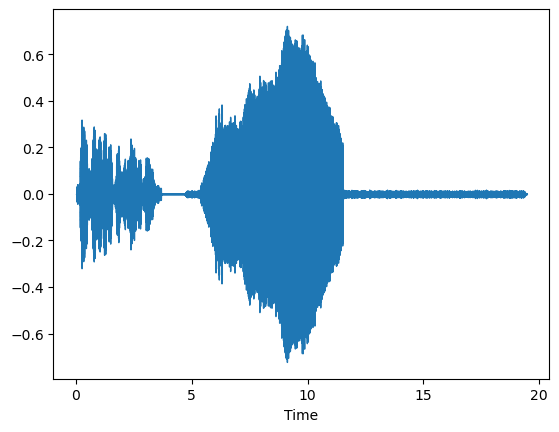

In [20]:
### Example loading of a file into librosa
### I don't know what the IO stuff is for exactly, but it seems to be necessary

import io
import librosa

session = boto3.Session(aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

s3 = session.resource('s3', 
                      verify = False #uncommnent if you have SLL error
                     ) 

my_bucket = s3.Bucket('chirpcheckerbucket')

for file in my_bucket.objects.filter(Prefix='32769'):
    bin_obj = file.get()['Body'].read()
    chirp_song, sr = librosa.load(io.BufferedReader(io.BytesIO(bin_obj)))
    
librosa.display.waveshow(chirp_song, sr= sr);
